Chapter 12

# 条件高斯分布
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码展示了在二维正态分布条件下 $Y|X$ 的条件概率密度函数 $f_{Y|X}(y|x)$ 的可视化。通过分析给定 $X$ 的情况下 $Y$ 的分布，代码生成并绘制了相关的三维等高线图和投影图，以帮助理解不同条件下的 $Y|X$ 分布。

### 1. 参数设定和条件分布计算

首先，定义二维正态分布的均值和协方差矩阵：
$$
\mu = \begin{bmatrix} \mu_X \\ \mu_Y \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}, \quad \Sigma = \begin{bmatrix} \sigma_X^2 & \sigma_X \sigma_Y \rho \\ \sigma_X \sigma_Y \rho & \sigma_Y^2 \end{bmatrix}
$$
其中 $\sigma_X = 1$ 和 $\sigma_Y = 1$，且相关系数 $\rho = 0.5$。

给定 $X$ 的情况下，计算 $Y$ 的条件概率密度函数 $f_{Y|X}(y|x)$，公式为：
$$
f_{Y|X}(y|x) = \frac{1}{\sigma_Y \sqrt{1 - \rho^2} \sqrt{2\pi}} \exp \left( -\frac{(y - (\mu_Y + \rho \sigma_Y / \sigma_X \cdot (x - \mu_X)))^2}{2 \sigma_Y^2 (1 - \rho^2)} \right)
$$
该函数由 `fcn_Y_given_X` 函数实现，并生成不同 $X$ 和 $Y$ 取值的密度网格。

### 2. 条件密度分布的三维可视化

在二维网格 $(XX, YY)$ 上计算 $f_{Y|X}$ 的值，并通过 `plot_wireframe` 函数绘制三维图。该图展示了在不同 $X$ 值下，$Y|X$ 的分布变化。

### 3. 在不同维度上的投影和等高线图

- **$X$ 到 $Y-Z$ 平面的投影**：条件密度在 $X$ 轴上沿 $Y$ 和 $Z$ 方向投影，显示了在不同 $Y$ 值上的条件密度变化。
- **$Z$ 到 $X-Y$ 平面的投影**：通过等高线展示了 $f_{Y|X}$ 的二维投影，反映在 $(x, y)$ 平面上的密度分布。

### 4. 条件均值和边界可视化

代码最后绘制了 $E(Y|X) = \mu_Y + \rho \sigma_Y / \sigma_X \cdot (X - \mu_X)$，该线表示 $Y|X$ 的条件期望。此外，代码还通过椭圆表示 $\Sigma$ 的等概率轮廓，并通过矩形框定 $\pm \sigma_X$ 和 $\pm \sigma_Y$ 范围内的边界。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm # 导入颜色映射
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import multivariate_normal
from scipy.stats import norm
from mpl_toolkits.mplot3d import axes3d

## 定义函数：计算给定X和Y的条件分布概率密度函数值

In [2]:
def fcn_Y_given_X (mu_X, mu_Y, sigma_X, sigma_Y, rho, X, Y):
    
    coeff = 1/sigma_Y/np.sqrt(1 - rho**2)/np.sqrt(2*np.pi)  # 计算系数
    sym_axis = mu_Y + rho*sigma_Y/sigma_X*(X - mu_X)  # 计算对称轴
    quad  = -1/2*((Y - sym_axis)/sigma_Y/np.sqrt(1 - rho**2))**2  # 计算指数中的二次项
    f_Y_given_X  = coeff*np.exp(quad)  # 计算条件概率密度值
    
    return f_Y_given_X

## 设置参数

In [3]:
rho     = 0.5  # 设置相关系数
sigma_X = 1    # 设置 X 的标准差
sigma_Y = 1    # 设置 Y 的标准差

mu_X = 0  # 设置 X 的均值
mu_Y = 0  # 设置 Y 的均值

width = 3  # 设置绘图范围
X = np.linspace(-width,width,31)  # 创建 X 的线性空间
Y = np.linspace(-width,width,31)  # 创建 Y 的线性空间

XX, YY = np.meshgrid(X, Y)  # 创建网格数据

In [4]:
f_Y_given_X = fcn_Y_given_X (mu_X, mu_Y, sigma_X, sigma_Y, rho, XX, YY)  # 计算条件概率密度

## 绘制 3D 条件分布图

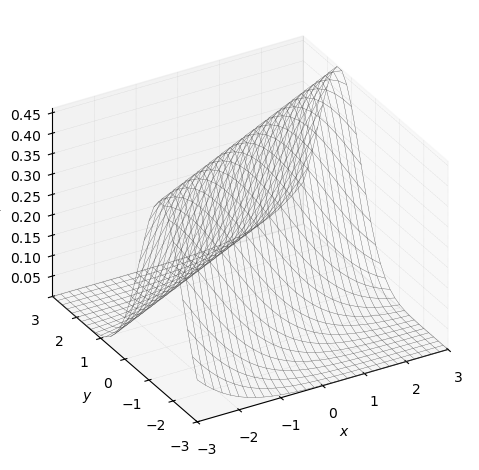

In [5]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建3D子图

ax.plot_wireframe(XX, YY, f_Y_given_X,
                  color = [0.3,0.3,0.3],
                  linewidth = 0.25)  # 绘制3D网格图

ax.set_xlabel('$x$')  # 设置 X 轴标签
ax.set_ylabel('$y$')  # 设置 Y 轴标签
ax.set_zlabel('$f_{Y|X}(y|x)$')  # 设置 Z 轴标签
ax.set_proj_type('ortho')  # 设置正交投影
ax.xaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 X 轴网格
ax.yaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 Y 轴网格
ax.zaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 Z 轴网格

ax.set_xlim(-width, width)  # 设置 X 轴范围
ax.set_ylim(-width, width)  # 设置 Y 轴范围
ax.set_zlim(f_Y_given_X.min(),f_Y_given_X.max())  # 设置 Z 轴范围
plt.tight_layout()  # 调整布局
ax.view_init(azim=-120, elev=30)  # 设置视角
plt.show()  # 显示图形

## 沿 X 投影到 Y-Z 平面

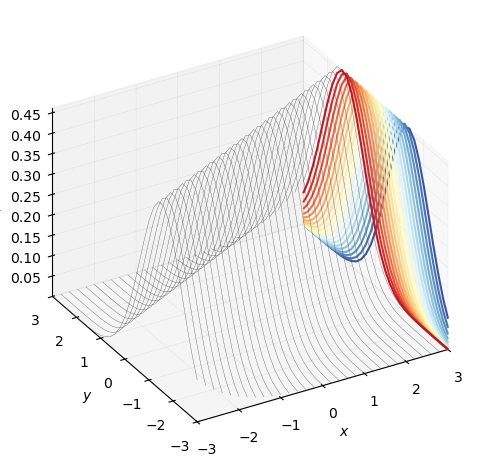

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_wireframe(XX, YY, f_Y_given_X, rstride=0, cstride=1,
                  color = [0.3,0.3,0.3],
                  linewidth = 0.25)  # 绘制网格图

ax.contour(XX, YY, f_Y_given_X, 
           levels = 20, zdir='x', \
            offset=YY.max(), cmap=cm.RdYlBu_r)  # 绘制投影轮廓

ax.set_xlabel('$x$')  # 设置 X 轴标签
ax.set_ylabel('$y$')  # 设置 Y 轴标签
ax.set_zlabel('$f_{Y|X}(y|x)$')  # 设置 Z 轴标签
ax.set_proj_type('ortho')  # 设置正交投影
ax.xaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 X 轴网格
ax.yaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 Y 轴网格
ax.zaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 Z 轴网格

ax.set_xlim(-width, width)  # 设置 X 轴范围
ax.set_ylim(-width, width)  # 设置 Y 轴范围
ax.set_zlim(f_Y_given_X.min(),f_Y_given_X.max())  # 设置 Z 轴范围
plt.tight_layout()  # 调整布局
ax.view_init(azim=-120, elev=30)  # 设置视角
plt.show()  # 显示图形

## 添加 X 边际分布

In [7]:
f_Y = norm.pdf(Y, loc=mu_Y, scale=sigma_Y)  # 计算 Y 的边际分布

(0.0, 0.46065886596178074)

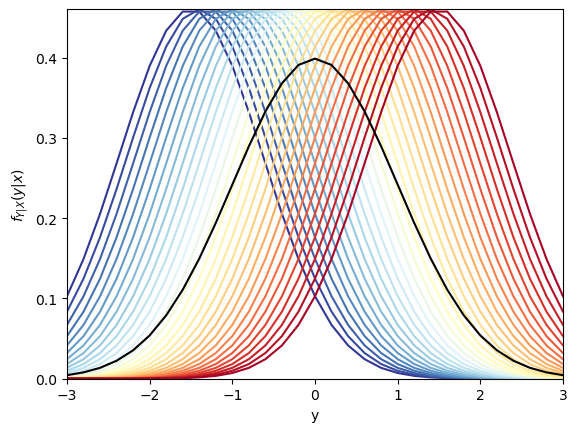

In [8]:
fig, ax = plt.subplots()  # 创建子图

colors = plt.cm.RdYlBu_r(np.linspace(0,1,len(X)))  # 设置颜色渐变

for i in np.linspace(1,len(X),len(X)):  # 遍历 X 的取值
    plt.plot(Y,f_Y_given_X[:,int(i)-1],
             color = colors[int(i)-1])  # 绘制条件分布

plt.plot(Y,f_Y, color = 'k')  # 绘制边际分布

plt.xlabel('y')  # 设置 X 轴标签
plt.ylabel('$f_{Y|X}(y|x)$')  # 设置 Y 轴标签
ax.set_xlim(-width, width)  # 设置 X 轴范围
ax.set_ylim(0, f_Y_given_X.max())  # 设置 Y 轴范围

## 沿 Z 投影到 X-Y 平面

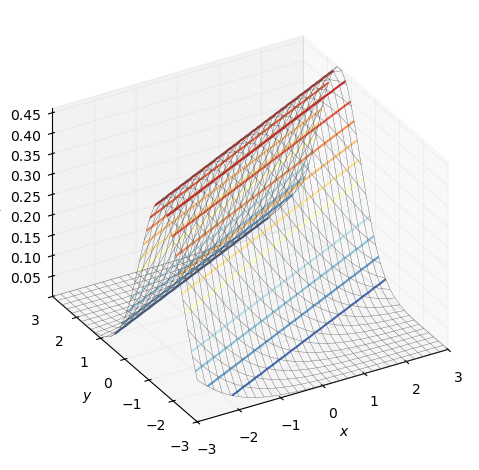

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_wireframe(XX, YY, f_Y_given_X,
                  color = [0.3,0.3,0.3],
                  linewidth = 0.25)  # 绘制3D网格图

ax.contour3D(XX,YY,f_Y_given_X,12,
              cmap = 'RdYlBu_r')  # 绘制3D轮廓图

ax.set_xlabel('$x$')  # 设置 X 轴标签
ax.set_ylabel('$y$')  # 设置 Y 轴标签
ax.set_zlabel('$f_{Y|X}(y|x)$')  # 设置 Z 轴标签
ax.set_proj_type('ortho')  # 设置正交投影
ax.xaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 X 轴网格
ax.yaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 Y 轴网格
ax.zaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 Z 轴网格

ax.set_xlim(-width, width)  # 设置 X 轴范围
ax.set_ylim(-width, width)  # 设置 Y 轴范围
ax.set_zlim(f_Y_given_X.min(),f_Y_given_X.max())  # 设置 Z 轴范围
plt.tight_layout()  # 调整布局
ax.view_init(azim=-120, elev=30)  # 设置视角
plt.show()  # 显示图形

## 绘制填充轮廓图

In [10]:
E_Y_given_X = mu_Y + rho*sigma_Y/sigma_X*(X - mu_X)  # 计算条件期望

Text(0, 0.5, '$y$')

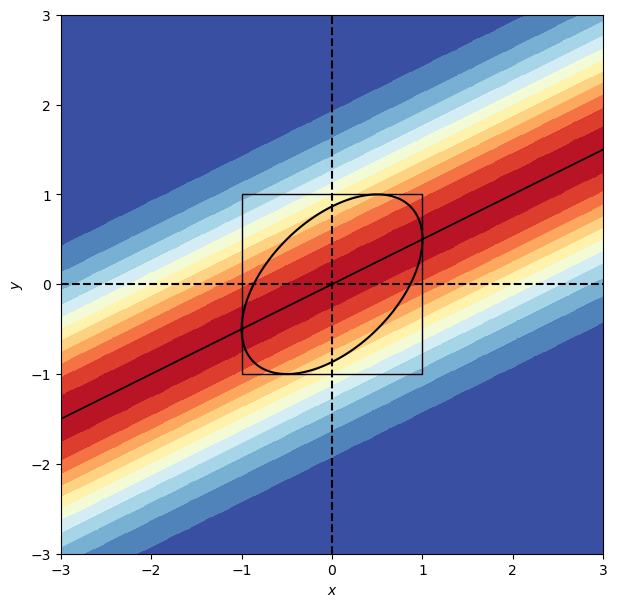

In [11]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(7, 7))  # 创建图形和坐标轴

plt.contourf(XX, YY, f_Y_given_X, 12, cmap=cm.RdYlBu_r)  # 绘制填充轮廓
plt.plot(X,E_Y_given_X, color = 'k', linewidth = 1.25)  # 绘制条件期望
plt.axvline(x = mu_X, color = 'k', linestyle = '--')  # 绘制垂直参考线
plt.axhline(y = mu_Y, color = 'k', linestyle = '--')  # 绘制水平参考线

x = np.linspace(-width,width,num = 201)  # 生成 X 坐标数据
y = np.linspace(-width,width,num = 201)  # 生成 Y 坐标数据

xx,yy = np.meshgrid(x,y);  # 创建网格

ellipse = ((xx/sigma_X)**2 - 
           2*rho*(xx/sigma_X)*(yy/sigma_Y) + 
           (yy/sigma_Y)**2)/(1 - rho**2);  # 计算等高线数据

plt.contour(xx,yy,ellipse,levels = [1], colors = 'k')  # 绘制椭圆轮廓

rect = Rectangle(xy = [- sigma_X, - sigma_Y] , 
                 width = 2*sigma_X, 
                 height = 2*sigma_Y,
                 edgecolor = 'k',facecolor="none")  # 创建矩形边界框

ax.add_patch(rect)  # 添加矩形到图形上

ax.set_xlabel('$x$')  # 设置 X 轴标签
ax.set_ylabel('$y$')  # 设置 Y 轴标签